In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!git clone https://github.com/zzh8829/yolov3-tf2

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 400, done.
remote: Total 400 (delta 0), reused 0 (delta 0), pack-reused 400
Receiving objects: 100% (400/400), 4.23 MiB | 6.94 MiB/s, done.
Resolving deltas: 100% (231/231), done.


# Download Dataset

In [5]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar -O ./data/voc2012_raw.tar
%mkdir -p ./data/voc2012_raw
!tar -xf ./data/voc2012_raw.tar -C ./data/voc2012_raw
%ls ./data/voc2012_raw/VOCdevkit/VOC2012 # Explore the dataset

--2021-03-30 00:23:29--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘./data/voc2012_raw.tar’

./data/voc2012_raw. 100%[===================>]   1.86G  75.4MB/s    in 26s     

2021-03-30 00:23:55 (74.7 MB/s) - ‘./data/voc2012_raw.tar’ saved [1999639040/1999639040]



# Review components

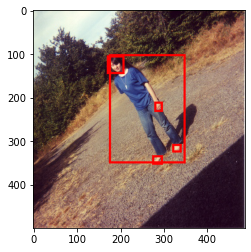

In [128]:
from PIL import Image, ImageDraw
image_path = './data/voc2012_raw/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg'
im = Image.open(image_path)
draw = ImageDraw.Draw(im)

import xml.etree.ElementTree as ET
annotation = './data/voc2012_raw/VOCdevkit/VOC2012/Annotations/2007_000027.xml'
tree = ET.parse(annotation)
root = tree.getroot()

list_bndbox = []

for e in root.iter('bndbox'):
    bndbox = []
    for child in e:
        bndbox.append(int(child.text))
    list_bndbox.append(bndbox)

for rectangle in list_bndbox:
    draw.rectangle(rectangle, outline=(255,0,0), width=5)

plt.imshow(np.asarray(im))
plt.show()
#%cat ./data/voc2012_raw/VOCdevkit/VOC2012/Annotations/2007_000027.xml

# Transform Dataset